In [1]:
from google.colab import files
uploaded = files.upload()


Saving House_prediction.zip.zip to House_prediction.zip.zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
from google.colab import files
uploaded = files.upload()


Saving House_prediction.csv.zip to House_prediction.csv.zip


In [9]:
import pandas as pd

# This assumes your file name is correct
df = pd.read_csv("House_prediction.csv.zip")

# View the first few rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [11]:
# Replace with your actual filename
df = pd.read_csv("House_prediction.csv.zip")

# Check the data
df.head()

# Summary
df.describe()

# Check for nulls
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [12]:
# Example: Drop rows with missing values
df.dropna(inplace=True)

# Optional: Check data types and encode categorical values if necessary
# df['column_name'] = df['column_name'].astype(float) or use pd.get_dummies() for categorical columns


In [13]:
X = df.drop("price", axis=1)  # Features
y = df["price"]               # Target


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
df.dtypes


,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [17]:
df = df.drop(columns=["date"])  # Replace "date" with actual column name


In [19]:
# Drop non-numeric columns from features
X = df.drop(["price", "street", "city", "statezip", "country"], axis=1)

# Confirm X has only numeric data
print(X.dtypes)

# Continue with split and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object


LinearRegression()

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 986921767056.0986
R-squared: 0.032283856632802865


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 986921767056.0986
R^2 Score: 0.032283856632802865


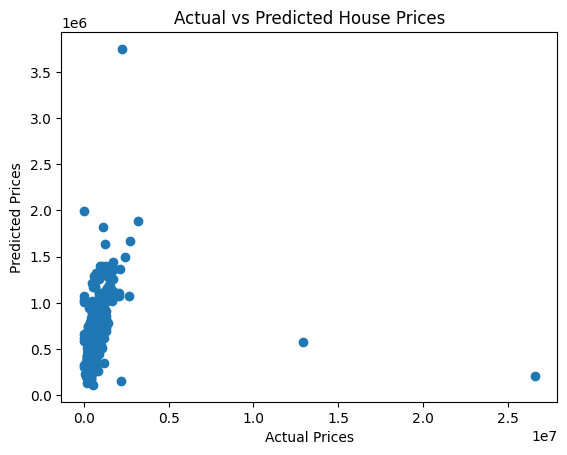

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Mean Squared Error: 978287574575.6007
R^2 Score: 0.040750026624413405


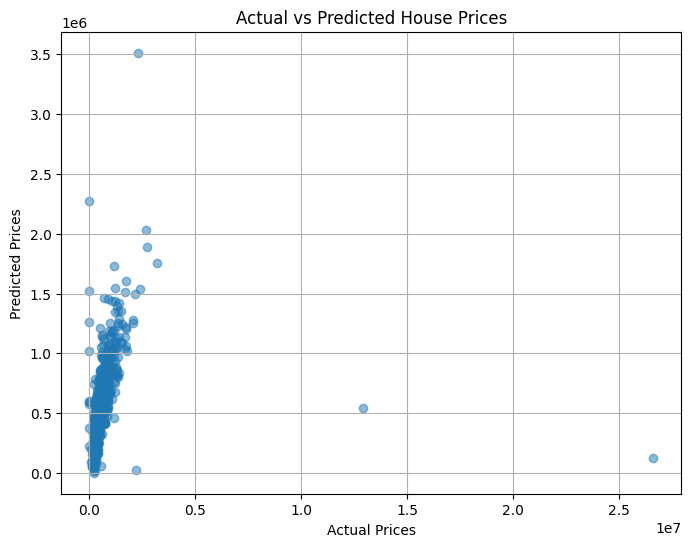

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("House_prediction.csv.zip")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# Drop columns that are not useful or too specific
df = df.drop(columns=["date", "street", "country"])

# Optional: extract ZIP code as numeric from statezip
df["zip"] = df["statezip"].str.extract(r'(\d+)', expand=False).astype(float)
df = df.drop(columns=["statezip"])

# One-hot encode 'city'
df = pd.get_dummies(df, columns=["city"], drop_first=True)

# Drop any missing rows
df.dropna(inplace=True)

# Define features and target
X = df.drop("price", axis=1)
y = df["price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Optional: Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("Random Forest R^2 Score:", r2_score(y_test, rf_predictions))


Random Forest Mean Squared Error: 970535592704.5939
Random Forest R^2 Score: 0.04835115393771616


In [27]:
import joblib

# Save model to file
joblib.dump(rf_model, "house_price_model.pkl")

# Download the model file to your local machine
from google.colab import files
files.download("house_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import joblib

# Load the .pkl model file
model = joblib.load("/content/house_price_model.pkl")


In [29]:
# Predict house prices using the loaded model
predictions = model.predict(X_test)

# View first few predictions
print(predictions[:5])


[ 465940.5         321279.68039683 1249864.74333333  395479.3
  241162.18160714]


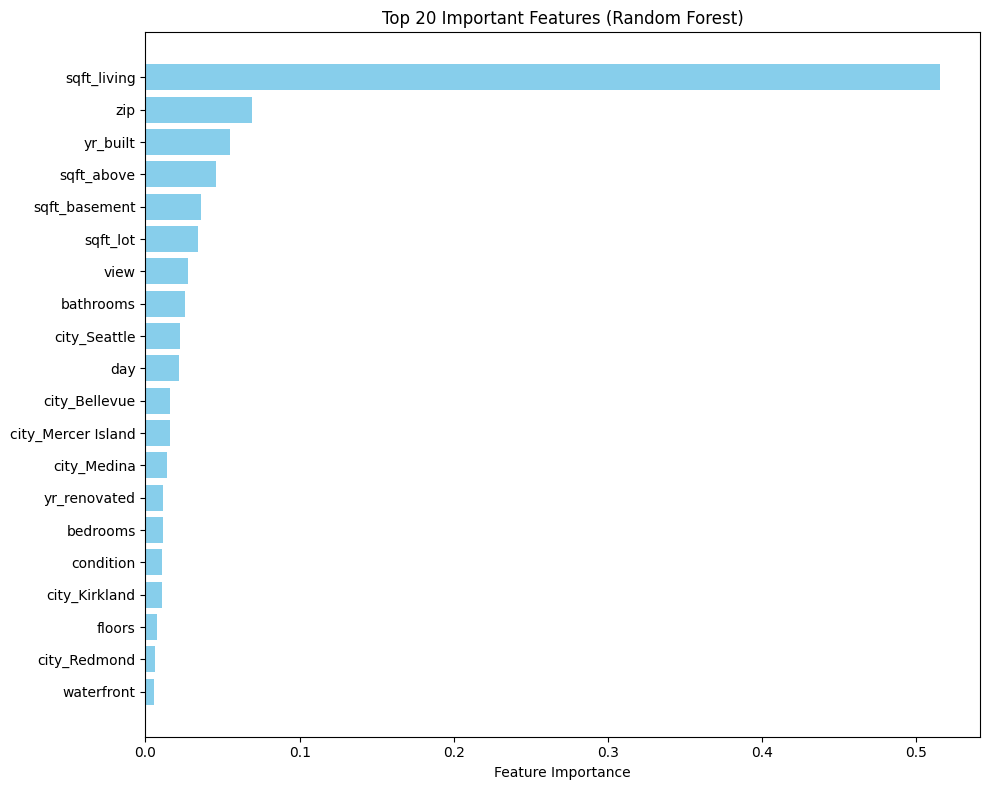

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances and feature names
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for sorting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance and take top 20
top_features = importance_df.sort_values(by="Importance", ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(top_features["Feature"], top_features["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (Random Forest)")
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()
